In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
target = df['Profit']
predictors = df.drop(columns = ['Profit'])

In [7]:
target.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [8]:
predictors.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


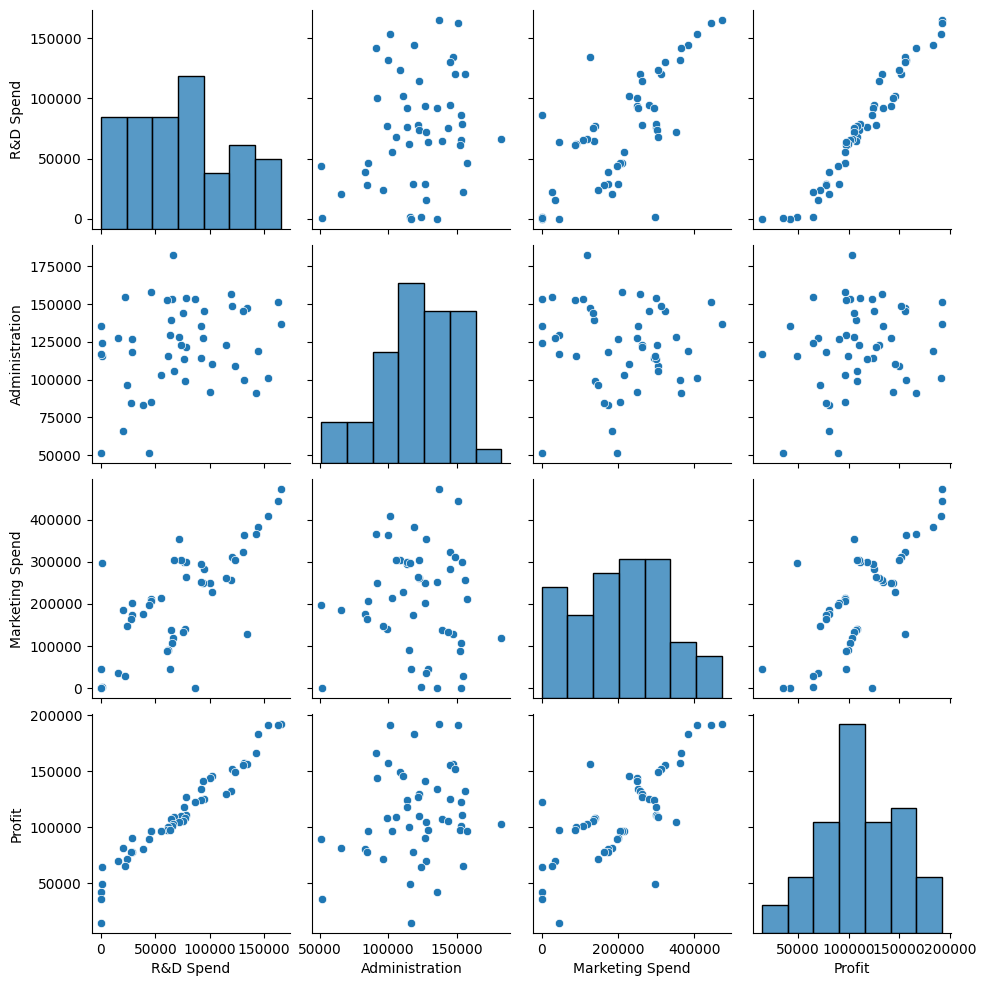

In [9]:
sns.pairplot(df)

In [10]:
predictors = df.drop(columns = ['Administration'])

<Axes: xlabel='State'>

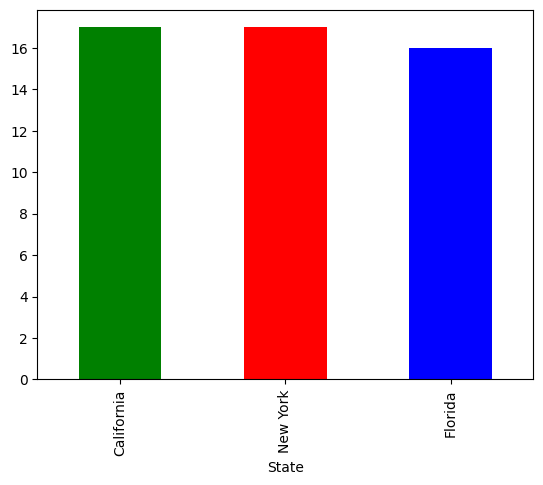

In [11]:
df.value_counts('State').plot(kind='bar', color=['g','r','b'])

In [12]:
state_encoded = pd.get_dummies(df['State'])

In [13]:
predictors = pd.concat([predictors, state_encoded], axis=1)

In [14]:
predictors = predictors.drop(columns = ['State'])

In [15]:
corr_matrix = predictors.corr()

<Axes: >

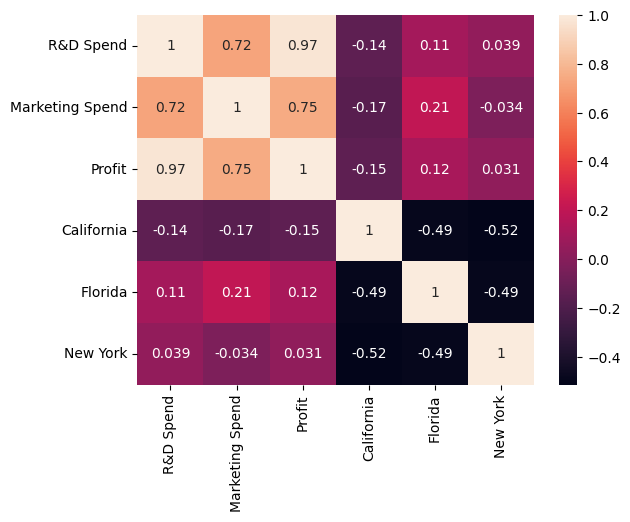

In [16]:
sns.heatmap(corr_matrix, annot=True)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=0)

In [18]:
lt = ['predictors', 'target', 'x_train', 'x_test', 'y_train', 'y_test']

for t in lt:
  print(f'Shape of {t} is : {locals()[t].shape}')

Shape of predictors is : (50, 6)
Shape of target is : (50,)
Shape of x_train is : (40, 6)
Shape of x_test is : (10, 6)
Shape of y_train is : (40,)
Shape of y_test is : (10,)


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

linear = LinearRegression()
ridge = Ridge(alpha = 1)
lasso = Lasso(alpha = 1)

In [21]:
linear.fit(x_train, y_train)

LinearRegression()

In [22]:
ridge.fit(x_train, y_train)

Ridge(alpha=1)

In [23]:
lasso.fit(x_train, y_train)

Lasso(alpha=1)

In [24]:
linear_predict_test = pd.DataFrame(linear.predict(x_test).reshape(len(linear_predict_test),1), columns = ['Linear_prediction']).reset_index(drop=True)

ridge_predict_test = pd.DataFrame(ridge.predict(x_test).reshape(len(ridge_predict_test),1), columns = ['Ridge_prediction']).reset_index(drop=True)

lasso_predict_test = pd.DataFrame(lasso.predict(x_test).reshape(len(lasso_predict_test),1), columns = ['Lasso_prediction']).reset_index(drop=True)

NameError: name 'linear_predict_test' is not defined

In [ ]:
y_test =  pd.DataFrame(y_test).reset_index(drop=True)

comparison_table = pd.concat([y_test, linear_predict_test, ridge_predict_test, lasso_predict_test], axis=1)

comparison_table

In [ ]:

plt.plot(y_test, label='Actual')
plt.plot(linear_predict_test, label='Linear Prediction')
plt.plot(ridge_predict_test, label='Ridge Prediction')
plt.plot(lasso_predict_test, label='Lasso Prediction')


plt.legend()
plt.title('Comparing Actual VS Predicted For Alpha = 1')


In [25]:
ridge_a3 = Ridge(alpha = 3)
lasso_a3 = Lasso(alpha = 3)

In [26]:
ridge_a3.fit(x_train, y_train)

Ridge(alpha=3)

In [27]:
lasso_a3.fit(x_train, y_train)

Lasso(alpha=3)

In [28]:
ridge_predict_a3_test = pd.DataFrame(ridge_a3.predict(x_test).reshape(len(ridge_predict_test),1), columns = ['Ridge_prediction']).reset_index(drop=True)

lasso_predict_a3_test = pd.DataFrame(lasso_a3.predict(x_test).reshape(len(lasso_predict_test),1), columns = ['Lasso_prediction']).reset_index(drop=True)

NameError: name 'ridge_predict_test' is not defined

In [ ]:
comparison_table_a3 = pd.concat([y_test, linear_predict_test, ridge_predict_a3_test, lasso_predict_a3_test], axis=1)

comparison_table_a3

NameError: name 'linear_predict_test' is not defined

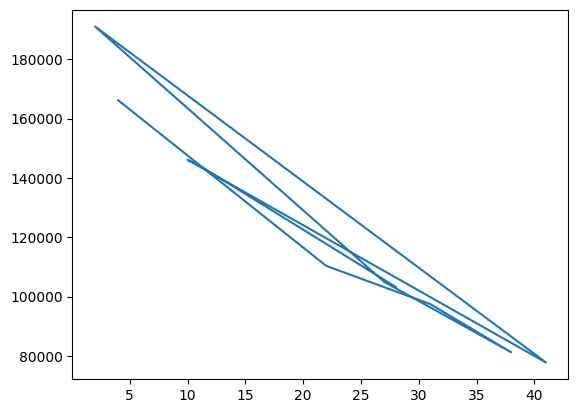

In [29]:

plt.plot(y_test, label='Actual')
plt.plot(linear_predict_test, label='Linear Prediction')
plt.plot(ridge_predict_a3_test, label='Ridge Prediction')
plt.plot(lasso_predict_a3_test, label='Lasso Prediction')


plt.legend()
plt.title('Comparing Actual VS Predicted For Alpha = 3')


In [ ]:
def alpha_acceleration():
    lamb = list(range(1, 13))
    comparison_table_a3 = pd.DataFrame()

    for i in lamb:
        lasso_alpha = i
        ridge_alpha = i
        lasso_accelerate = Lasso(alpha=i)
        ridge_accelerate = Ridge(alpha=i)
        l = lasso_accelerate.fit(x_train, y_train)
        r = ridge_accelerate.fit(x_train, y_train)
        lasso_pred = pd.DataFrame(l.predict(x_test).reshape(len(x_test), 1), columns=[f'Lasso_{lasso_alpha}_prediction'])
        ridge_pred = pd.DataFrame(r.predict(x_test).reshape(len(x_test), 1), columns=[f'Ridge_{ridge_alpha}_prediction'])

        compar = pd.concat([y_test, linear_predict_test, ridge_pred, lasso_pred], axis=1)

        if comparison_table_a3.empty:
            comparison_table_a3 = compar
        else:
            comparison_table_a3 = pd.concat([comparison_table_a3, compar], axis=1)

    return comparison_table_a3

comparison_table_a3 = alpha_acceleration()


In [ ]:
alpha_acceleration()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def alpha_acceleration():
    lamb = list(range(1, 13))
    comparison_table_a3 = pd.DataFrame()

    # Create a 3x4 subplot grid
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    fig.tight_layout(pad=3.0)  # Add some padding between subplots

    for i, ax in zip(lamb, axes.flatten()):
        lasso_alpha = i
        ridge_alpha = i
        lasso_accelerate = Lasso(alpha=i)
        ridge_accelerate = Ridge(alpha=i)
        l = lasso_accelerate.fit(x_train, y_train)
        r = ridge_accelerate.fit(x_train, y_train)
        lasso_pred = pd.DataFrame(l.predict(x_test).reshape(len(x_test), 1), columns=[f'Lasso_{lasso_alpha}_prediction'])
        ridge_pred = pd.DataFrame(r.predict(x_test).reshape(len(x_test), 1), columns=[f'Ridge_{ridge_alpha}_prediction'])

        compar = pd.concat([y_test, linear_predict_test, ridge_pred, lasso_pred], axis=1)

        if comparison_table_a3.empty:
            comparison_table_a3 = compar
        else:
            comparison_table_a3 = pd.concat([comparison_table_a3, compar], axis=1)

        # Plotting
        ax.plot(y_test)
        ax.plot(linear_predict_test)
        ax.plot(ridge_pred)
        ax.plot(lasso_pred)
        ax.set_title(f'Alpha = {i}')
        ax.legend(["y_test", "Linear Prediction", "Ridge Prediction", "Lasso Prediction"])

    return comparison_table_a3

comparison_table_a3 = alpha_acceleration()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, max_depth=4)

forest.fit(x_train, y_train)

In [ ]:
p = pd.DataFrame(forest.predict(x_test).reshape(len(forest.predict(x_test)),1)).reset_index(drop=True)
c = pd.concat([y_test, p], axis=1)
plt.plot(p)
plt.plot(y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor()

boost.fit(x_train, y_train)

In [ ]:
g = pd.DataFrame(boost.predict(x_test).reshape(len(boost.predict(x_test)),1)).reset_index(drop=True)
h = pd.concat([y_test, g], axis=1)
plt.plot(g)
plt.plot(y_test)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

a = AdaBoostRegressor()

a.fit(x_train,y_train)

In [ ]:
ad = pd.DataFrame(a.predict(x_test).reshape(len(a.predict(x_test)),1)).reset_index(drop=True)
ha = pd.concat([y_test, ad], axis=1)
plt.plot(ad)
plt.plot(y_test)

In [ ]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

In [ ]:
regp = pd.DataFrame(a.predict(x_test).reshape(len(a.predict(x_test)),1)).reset_index(drop=True)
rr = pd.concat([y_test, ad], axis=1)
plt.plot(regp)
plt.plot(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, Lars, LassoLars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Create a dictionary to store results
results = {}

# Create instances of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge(),
    "Huber Regressor": HuberRegressor(),
    "Lars": Lars(),
    "Lasso Lars": LassoLars(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "Bagging": BaggingRegressor(),
    "MLP Neural Network": MLPRegressor()
}

results_list = []

for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Make predictions

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results to the list
    results_list.append([model_name, mse, r2])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list, columns=["Model Name", "Mean Squared Error", "R-squared"])

# Compare and visualize results
print(results_df)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
from sklearn import metrics as mt

class RegressionModelEvaluator:
    def __init__(self, feature, label, test_size=0.2, random_state=0):
        self.feature = feature
        self.label = label
        self.test_size = test_size
        self.random_state = random_state

    def split_data(self):
        x_train, x_test, y_train, y_test = train_test_split(self.feature, self.label, test_size=self.test_size, random_state=self.random_state)
        return x_train, x_test, y_train, y_test

    def evaluate_models(self):
        x_train, x_test, y_train, y_test = self.split_data()

        models = {
            'Linear Regression': lm.LinearRegression(),
            'Ridge Regression': lm.Ridge(),
            'Lasso Regression': lm.Lasso(),
            'Elastic Net Regression': lm.ElasticNet(),
            'Ridge CV': lm.RidgeCV(),
            'Lasso Lars': lm.LassoLars(),
            'Bayesian Ridge': lm.BayesianRidge(),
            'Multi Task Lasso': lm.MultiTaskLasso(),
            'Multi Task Elastic Net': lm.MultiTaskElasticNet(),
            'Least Angle Regression': lm.Lars(),
            'Orthogonal Matching Pursuit': lm.OrthogonalMatchingPursuit(),

            'Tweedie Regressor': lm.TweedieRegressor(),
            'Stochastic Regressor': lm.SGDRegressor(),
            'Huber Regressor': lm.HuberRegressor(),
            'RANdom SAmple Consensus': lm.RANSACRegressor(),
            'TheilSen Regressor': lm.TheilSenRegressor(),
            'Perceptron': lm.Perceptron(),
            'Passive Aggressive Regressor': lm.PassiveAggressiveRegressor(),
            'Quantile Regressor': lm.QuantileRegressor(),
        }

        model_score_list = []

        for model_name, model_obj in models.items():
            model_obj.fit(x_train, y_train)
            y_pred = model_obj.predict(x_test)

            mae = mt.mean_absolute_error(y_test, y_pred)
            mse = mt.mean_squared_error(y_test, y_pred)
            r2 = mt.r2_score(y_test, y_pred)
            mape = mt.mean_absolute_percentage_error(y_test, y_pred)
            me = mt.max_error(y_test, y_pred)

            model_score_list.append([model_name, mae, mse, r2, mape, me])

        final_table = pd.DataFrame(model_score_list, columns=['Model name', 'Mean_absolute_error', 'Mean_squared_error', 'r2_score', 'Mean_absolute_%_error', 'Max_error'])
        return final_table

# Usage:
feature_data = predictors  # Replace with your actual feature data
label_data = target  # Replace with your actual label data

evaluator = RegressionModelEvaluator(feature_data, label_data)
results = evaluator.evaluate_models()
print(results)
